# The aim of this notebook is to create a 3D view of the uploaded tile using POLTLY 3D.

# Data Exploration : Inomata Lidar dataset (test set)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import data

In [2]:
#! pip install laspy
! pip install "laspy[lazrs]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.5 MB/s eta 0:00:00
  Created wheel for laspy: filename=laspy-2.4.1-py3-none-any.whl size=68045 sha256=15ac2127eef1439c502ec9cc240c809c87804c2e5d497452d4fa948636963b1e
  Stored in directory: /root/.cache/pip/wheels/04/a4/0c/c8e8ba29abc06fafe864c7c4402748ceb617a7c057e8cc8579
Successfully built laspy


In [3]:
import laspy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data from
https://portal.opentopography.org/datasetMetadata?otCollectionID=OT.042022.32615.1

In [4]:
input_path = "/content/drive/MyDrive/MX19_Inomata/point_cloud_tiles"
#Load data and check point format
point_cloud = laspy.read(f"{input_path}/61000_1951000.laz")
point_cloud.header

<LasHeader(1.2, <PointFormat(1, 0 bytes of extra dims)>)>

Infos about Point Format
https://laspy.readthedocs.io/en/latest/intro.html

Point format 1


In [5]:
#Available data
point_format = point_cloud.point_format
list(point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time']

In [6]:
category_name_dict = {'1' : 'unclassified',
                      '2' : 'ground',
                      '3' : 'low vegetation',
                      '4' : 'medium vegetation',
                      '5' :  'high vegetation',
                      '6' : 'building',
                      '7' : 'low noise',
                      '8' : 'model key',
                      '15' : 'transmission tower',
                      '18' : 'high noise'}

In [7]:
color_dict = {'unclassified': '#000000',
              'ground': '#D29B5A',
              'low vegetation': '#ACE628',
              'medium vegetation': '#70E628',
              'high vegetation': '#468420',
              'building': '#FF0000',
              'low noise': '#FF00DC',
              'model key': '#0036FF',
              'transmission tower': '#00B9FF',
              'high noise': '#6C00FF'}

In [8]:
#store coordinates in "points", and colors in "colors" variable
lidar_data = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z, point_cloud.classification)).transpose()
df = pd.DataFrame(lidar_data, columns = ['x','y','z','category'])
df['category']=df['category'].astype(int).astype(str)
df['category']=[category_name_dict[i] for i in df['category']]
df['color']= [color_dict[i] for i in df['category']]

factor=5#16
df_decimated = df.iloc[::factor]

In [ ]:
df_decimated

x           y     z        category    color
0        674721.72  1961999.86 -0.79          ground  #D29B5A
5        674722.48  1961998.92 -0.79          ground  #D29B5A
10       674723.22  1961998.02 -0.80          ground  #D29B5A
15       674723.16  1961997.85 -0.80          ground  #D29B5A
20       674722.46  1961998.70 -0.82          ground  #D29B5A
...            ...         ...   ...             ...      ...
3509760  674999.29  1961915.37  8.61          ground  #D29B5A
3509765  674998.66  1961916.54  8.48          ground  #D29B5A
3509770  674998.13  1961917.42  8.79  low vegetation  #ACE628
3509775  674998.91  1961916.36  8.53          ground  #D29B5A
3509780  674999.52  1961915.24  8.63          ground  #D29B5A

[701957 rows x 5 columns]

## Display in 3D the points

In [9]:
df_decimated.dtypes

x           float64
y           float64
z           float64
category     object
color        object
dtype: object

In [ ]:
# !pip install --upgrade nbformat
# import plotly
# import plotly.express as px
#fig = px.scatter_3d(df_decimated, x='x', y='y', z='z',
#              color='category', color_discrete_map=colors_dict,
#              )
# fig.update_traces(marker={'size': 12})

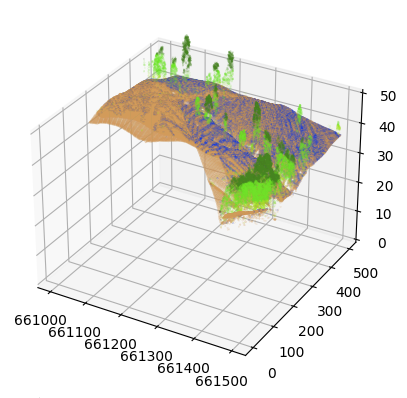

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.scatter(df_decimated['x'], df_decimated['y'], df_decimated['z'], c =df_decimated['color'], s=0.01)#, c = decimated_colors/65535, s=0.01)
ax.set_zlim(0,50)
plt.show()


In [40]:
import plotly.express as px

# Define custom category colors using hexadecimal values
category_colors = color_dict

fig = px.scatter_3d(df_decimated, x='x', y='y', z='z', color='category', hover_data=['category'],  color_discrete_map=category_colors)
fig.update_traces(marker={"size" : 1})
fig.update_layout(scene=dict(xaxis=dict(showgrid=False),
                             yaxis=dict(showgrid=False),
                             zaxis=dict(showgrid=False)))

fig.update_layout(scene=dict(xaxis=dict(showbackground=False),
                             yaxis=dict(showbackground=False),
                             zaxis=dict(showbackground=False)))

fig.update_layout(scene=dict(xaxis=dict(showticklabels=False),
                             yaxis=dict(showticklabels=False),
                             zaxis=dict(showticklabels=False)))


fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
####################################################

##. END OF 3D VISUALIZATION

####################################################

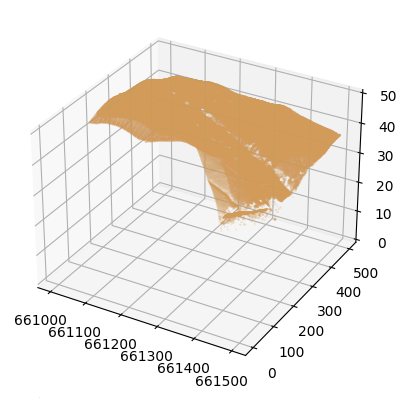

In [13]:
df_ground=df[df['category']=='ground']
df_ground_decimated = df_ground.iloc[::factor]
ax = plt.axes(projection='3d')
ax.scatter(df_ground_decimated['x'], df_ground_decimated['y'], df_ground_decimated['z'], c =df_ground_decimated['color'], s=0.01)#, c = decimated_colors/65535, s=0.01)
ax.set_zlim(0,50)
plt.show()

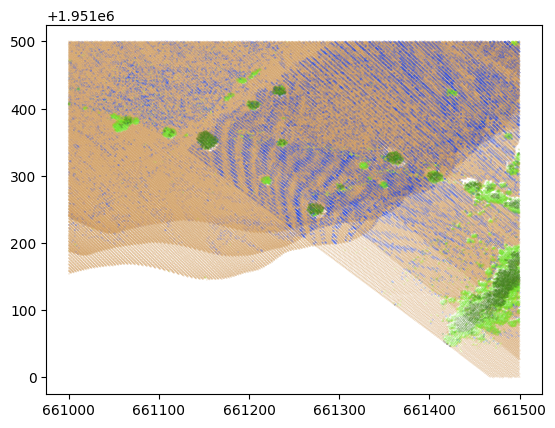

In [14]:
plt.scatter(df_decimated['x'], df_decimated['y'], c=df_decimated['color'] , s=0.01)#, c = decimated_colors/65535, s=0.01)
plt.show()

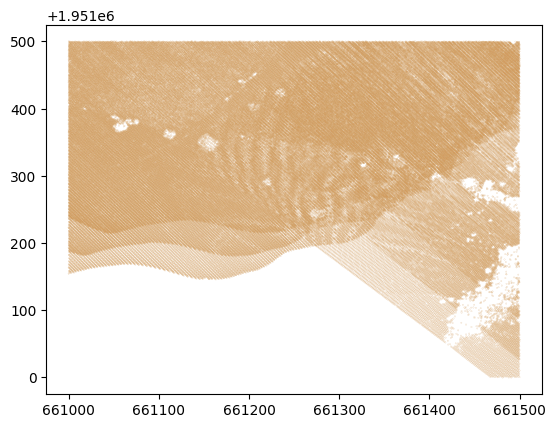

In [15]:
# Ground coverage
plt.scatter(df_ground_decimated['x'], df_ground_decimated['y'], c=df_ground_decimated['color'] , s=0.01)#, c = decimated_colors/65535, s=0.01)
plt.show()

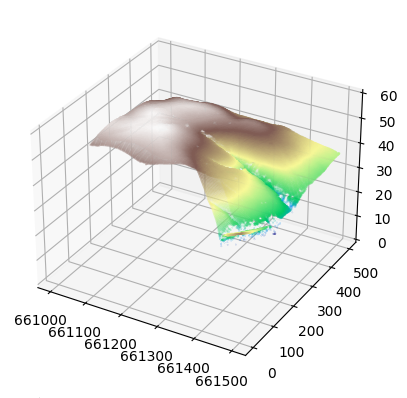

In [17]:
# Plot only the ground elevation
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.scatter(df_ground_decimated['x'], df_ground_decimated['y'], df_ground_decimated['z'], c=df_ground_decimated['z'], cmap='terrain', s=0.01)#, c = decimated_colors/65535, s=0.01)
ax.set_zlim(0,60)
plt.show()

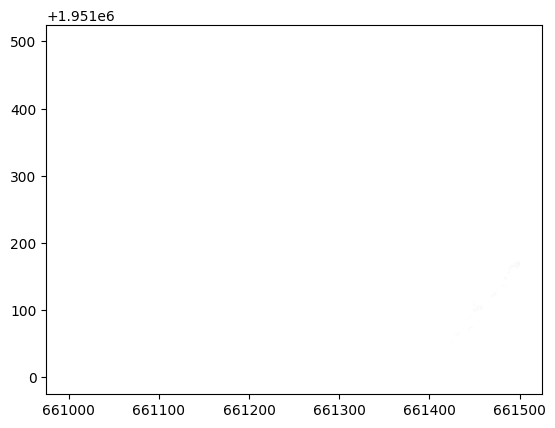

In [18]:
plt.scatter(df['x'], df['y'], c=df['z'], cmap='terrain', vmin=0, vmax=30, s=0.01)#, c = decimated_colors/65535, s=0.01)
plt.show()

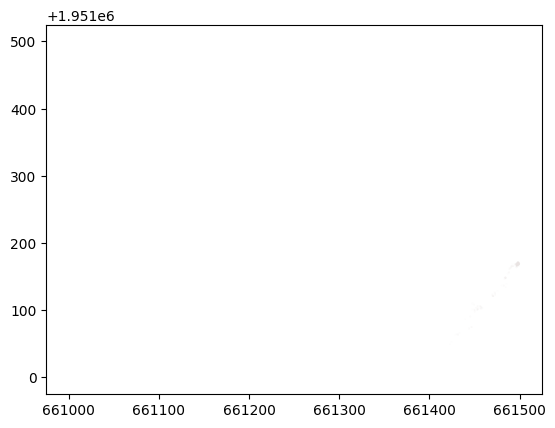

In [19]:
plt.scatter(df_ground['x'], df_ground['y'], c=df_ground['z'], cmap='terrain', vmin=0, vmax=30, s=0.01)#, c = decimated_colors/65535, s=0.01)

plt.show()

## Interpolation using K-Nearest Neighbors

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon, Point

proj = "EPSG:32615"

# Get X and Y coordinates of rainfall points
x_coordinates = df_ground.x
y_coordinates = df_ground.y

#Create list of XY coordinate pairs
coords = [list(xy) for xy in zip(x_coordinates, y_coordinates)]
elevation = list(df_ground.z)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Split data into testing and training sets
coords_train, coords_test, elevation_train, elevation_test = train_test_split(coords, elevation, test_size = 0.20)

# Set number of neighbors to look for
neighbors = 5

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors = neighbors, weights = "distance")

# Fit regressor to data
knn_regressor.fit(coords_train, elevation_train)

KNeighborsRegressor(weights='distance')

In [ ]:
# Generate out-sample R^2
r_squared_knn = knn_regressor.score(coords_test, elevation_test)
print("KNN out-sample r-squared: {}".format(round(r_squared_knn, 5)))


KNN out-sample r-squared: 0.99988


In [ ]:
# Outputing regular grid
SAMPLING_IN_M = 0.5

X_MIN = min(df_ground.x)
X_MAX = max(df_ground.x)
X_RANGE = X_MAX - X_MIN
print('X range in m: {}'.format(round(X_RANGE, 0)))

Y_MIN = min(df_ground.y)
Y_MAX = max(df_ground.y)
Y_RANGE = Y_MAX - Y_MIN
print('Y range in m: {}'.format(round(Y_RANGE, 0)))

X range in m: 500.0
Y range in m: 500.0


In [ ]:
x_coordinates_pred = np.arange(X_MIN,X_MAX,SAMPLING_IN_M)
X_SAMPLES = len(x_coordinates_pred)
y_coordinates_pred = np.arange(Y_MIN,Y_MAX,SAMPLING_IN_M)
Y_SAMPLES = len(y_coordinates_pred)
pred_coords = []
for x in x_coordinates_pred:
    for y in y_coordinates_pred:
        pred_coords.append([x,y])

In [ ]:
elevation_df = pd.DataFrame(pred_coords, columns =['x', 'y'])
elevation_df['elevation'] = knn_regressor.predict(pred_coords)

In [ ]:
elevation_df.shape

(1000000, 3)

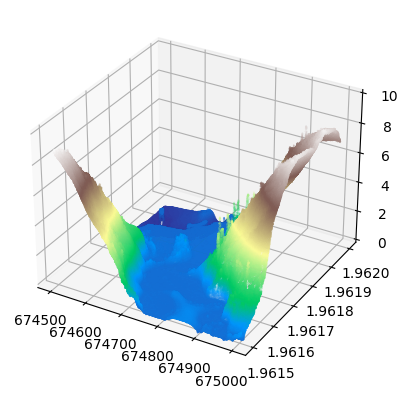

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(elevation_df['x'], elevation_df['y'], elevation_df['elevation'], c=elevation_df['elevation'], cmap='terrain', s=0.01)
ax.set_zlim(0,10)
plt.show()

# Testing LAZ to DEM

In [ ]:
# To install GDAL, use 'brew install GDAL'
# then pip3.4 install gdal
# brew reinstall geos
# brew resinstall gdal

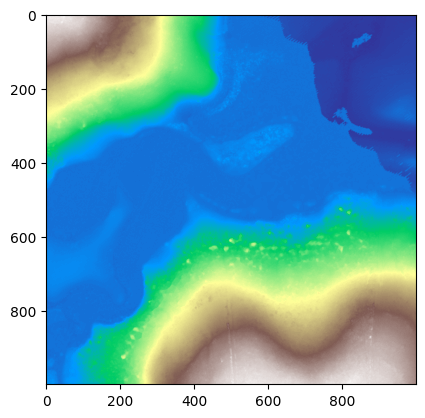

In [ ]:
from tifffile import imsave
from PIL import Image
dem_arr = elevation_df['elevation'].to_numpy()
dem_arr = np.reshape(dem_arr,(X_SAMPLES,Y_SAMPLES))
plt.imshow(dem_arr, cmap='terrain')  # show DEM

im = Image.fromarray(dem_array) # float32
im.save("dem.tiff", "TIFF")

#imsave('test.tif', dem_array) #, description="hohoho")


# Creating DEM from Lidar Point Cloud

In [ ]:
import RVT_py as rvt
import rvt.default
import rvt.blend

# Hill shade

Values of hill shade are between 0.0 and 0.9989460706710815


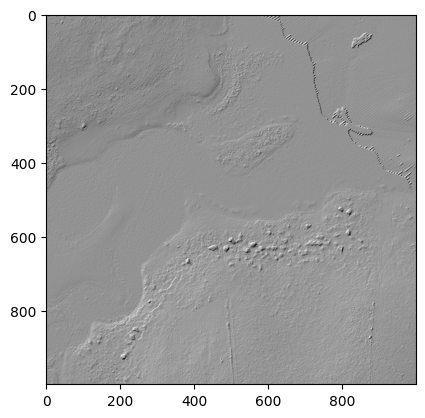

In [ ]:
default = rvt.default.DefaultValues()
default.hs_sun_el = 35
default.hs_sun_azi = 315
hillshade_arr = default.get_hillshade(dem_arr=dem_arr, resolution_x=SAMPLING_IN_M, resolution_y=SAMPLING_IN_M)
plt.imshow(hillshade_arr, cmap='gray')

print(f'Values of hill shade are between {hillshade_arr.min()} and {hillshade_arr.max()}')

# Slope

In [ ]:
default.slp_compute = 35

Values of slope are between 0.0 and 1.0


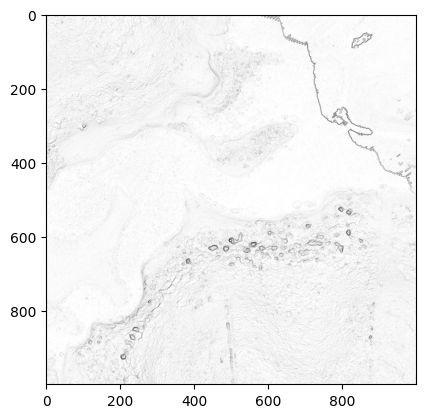

In [ ]:
default.slp_output_units = "degree"
slope_arr = default.get_slope(dem_arr=dem_arr, resolution_x=SAMPLING_IN_M, resolution_y=SAMPLING_IN_M)
plt.imshow(slope_arr, cmap='gray_r')
slope_arr = np.clip(slope_arr/(55),0,1)
print(f'Values of slope are between {slope_arr.min()} and {slope_arr.max()}')

# Sky view factor and positive openness

Skyview factor values are between 0.0 and 1.0


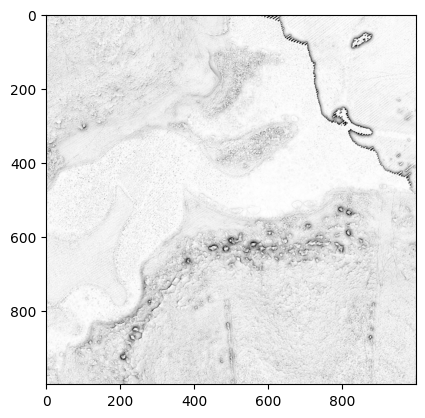

In [ ]:
svf_n_dir = 16  # number of directions
svf_r_max = int(5/SAMPLING_IN_M) # max search radius in pixels
svf_noise = 0  # level of noise remove (0-don't remove, 1-low, 2-med, 3-high)

svf_opns_dict = default.get_sky_view_factor(dem_arr=dem_arr, resolution=SAMPLING_IN_M,
                                                 compute_svf=True, compute_asvf=False, compute_opns=True)

svf_arr = svf_opns_dict["svf"]
svf_arr = np.clip((svf_arr-0.65)/0.35,0,1)

plt.imshow(svf_arr, cmap='gray')

print(f'Skyview factor values are between {svf_arr.min()} and {svf_arr.max()}')

Positive openness are between 0.0 and 1.0


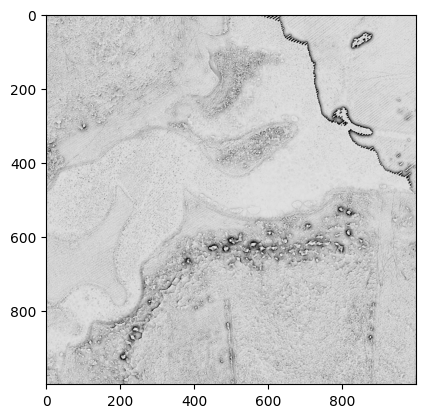

In [ ]:
opns_arr = svf_opns_dict["opns"]
opns_arr = np.clip((opns_arr-75)/17,0,1)
plt.imshow(opns_arr, cmap='gray')
print(f'Positive openness are between {opns_arr.min()} and {opns_arr.max()}')

# Image Blending

In [ ]:
! ls RVT_py/settings/default_settings.json

RVT_py/settings/default_settings.json


In [ ]:
# automatic blending, blending from blender_file with values from default.DefaultValues class
# when save_visualizations=False, blending save every needed visualization in GeoTif in dem_path directory
input_dem_path = "dem.tiff"
# Example file (for file_path) in dir settings: blender_file_example.txt
blender_file = "RVT_py/settings/blender_VAT.json"
output_blend_path = "dem_automatic.tif"
layers_auto = rvt.blend.BlenderCombination()
default = rvt.default.DefaultValues()
default.read_default_from_file("RVT_py/settings/default_settings.json")
layers_auto.read_from_file(file_path=blender_file)  # build BlenderCombination from file
# when building_blender from file single BlenderLayer image and image_path are None
layers_auto.add_dem_path(input_dem_path)  # needed when save_visualizations is True and save_rander_path is not None
# render_all_images reads images simultaneously if layer (BlenderLayer) image is None and image_path is None it
# calculates them
layers_auto.render_all_images(default=default, save_visualizations=True, save_render_path=output_blend_path,
                              save_float=True, save_8bit=True)
#####


array([[0.9417898 , 0.9458947 , 0.9426435 , ..., 0.93709874, 0.9440115 ,
        0.94432116],
       [0.91561866, 0.9333592 , 0.9395454 , ..., 0.94363135, 0.943614  ,
        0.94457763],
       [0.884506  , 0.89538276, 0.9273176 , ..., 0.94437045, 0.9446459 ,
        0.94347143],
       ...,
       [0.94134283, 0.93406004, 0.92767644, ..., 0.8843042 , 0.8813174 ,
        0.87971455],
       [0.9280804 , 0.89636374, 0.924416  , ..., 0.8927344 , 0.87900895,
        0.86859775],
       [0.95154476, 0.9480233 , 0.9456126 , ..., 0.89450353, 0.88964576,
        0.9011438 ]], dtype=float32)

# Generating the images (Why Not a Single Image? Combining Visualizations to Facilitate Fieldwork and On-Screen Mapping)

In [ ]:
<img src='Image_processing_workflow.png' alt="text"/>

SyntaxError: invalid syntax (3339200544.py, line 1)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio

## Voxel

In [ ]:
# Initialize the number of voxels to create to fill the space including every point
voxel_size=6
nb_vox=np.ceil((np.max(points, axis=0) - np.min(points, axis=0))/voxel_size)
#nb_vox.astype(int) #this gives you the number of voxels per axis

In [ ]:
# Compute the non empty voxels and keep a trace of indexes that we can relate to points in order to store points later on.
# Also Sum and count the points in each voxel.
non_empty_voxel_keys, inverse, nb_pts_per_voxel= np.unique(((points - np.min(points, axis=0)) // voxel_size).astype(int), axis=0, return_inverse=True, return_counts=True)
idx_pts_vox_sorted=np.argsort(inverse)
#len(non_empty_voxel_keys) # if you need to display how many no-empty voxels you have

# Create a function to produce tile plot

In [ ]:
def plot_tile(tile_name, decimation_factor = 50, voxel_size=6):
    path = f"data_inomata/tiles/{tile_name}.laz"
    point_cloud = laspy.read(path)
    points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.classification)).transpose()
    decimated_points = points[::decimation_factor]
    nb_vox = np.ceil((np.max(points, axis=0) - np.min(points, axis=0))/voxel_size)
    non_empty_voxel_keys, inverse, nb_pts_per_voxel = np.unique(((points - np.min(points, axis=0)) // voxel_size).astype(int), axis=0, return_inverse=True, return_counts=True)
    idx_pts_vox_sorted = np.argsort(inverse)
    voxel_grid={}
    grid_barycenter,grid_candidate_center=[],[]
    last_seen=0
    for idx,vox in enumerate(non_empty_voxel_keys):
      voxel_grid[tuple(vox)]=points[idx_pts_vox_sorted[last_seen:last_seen+nb_pts_per_voxel[idx]]]
      grid_barycenter.append(np.mean(voxel_grid[tuple(vox)],axis=0))
      grid_candidate_center.append(voxel_grid[tuple(vox)][np.linalg.norm(voxel_grid[tuple(vox)]-np.mean(voxel_grid[tuple(vox)],axis=0),axis=1).argmin()])
      last_seen+=nb_pts_per_voxel[idx]
    ax = plt.axes()
    ax.scatter(decimated_points[:,0], decimated_points[:,1] , c = decimated_points[:,2], cmap = cm, s=0.01)
    return plt.show()

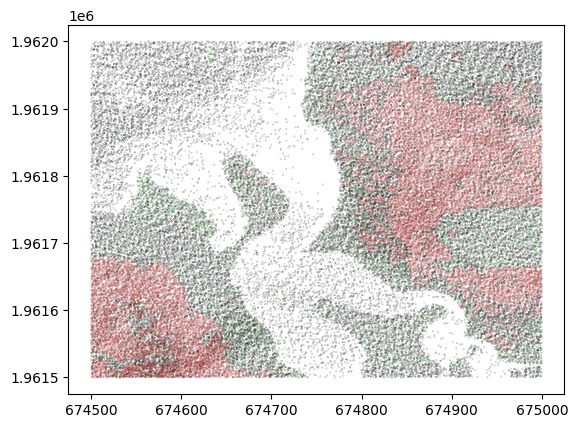

In [ ]:
plot_tile(tile_name = '74500_1961500', decimation_factor = 50, voxel_size=6)

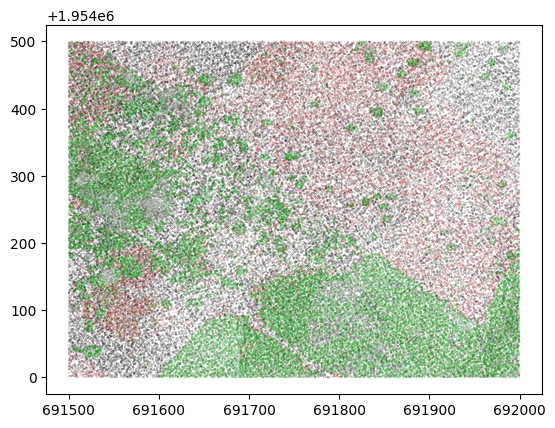

In [ ]:
plot_tile(tile_name = '691500_1954000')

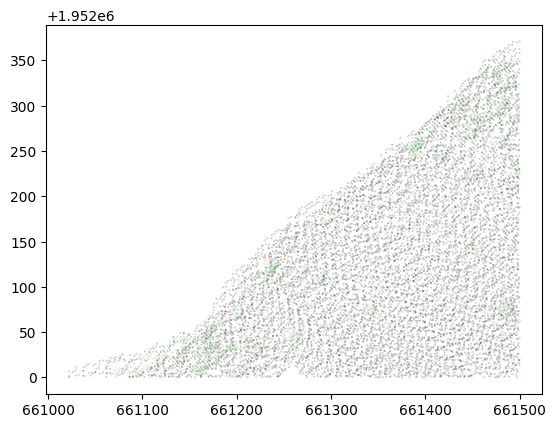

In [ ]:
plot_tile(tile_name = '61000_1952000')

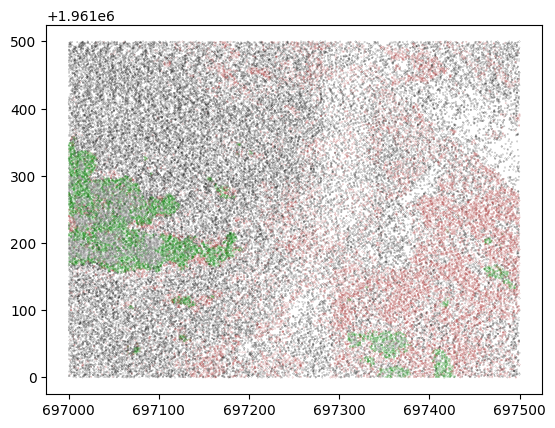

In [ ]:
plot_tile(tile_name = '697000_1961000')

# List all tile names

In [ ]:
import os
import csv

folder_path = "/Users/user/Library/Mobile Documents/com~apple~CloudDocs/[02]-work/[02]-2023-le-wagon/[04]-final-project/data_inomata/tiles"  # Replace with the actual folder path

# Get the list of files in the folder
file_names = os.listdir(folder_path)

# Specify the path and filename for the CSV file
csv_file_path = "/Users/user/Library/Mobile Documents/com~apple~CloudDocs/[02]-work/[02]-2023-le-wagon/[04]-final-project/data_inomata/tiles/tiles-list.csv"  # Replace with the desired output path

# Open the CSV file in write mode
with open(csv_file_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)

    # Write the header row
    writer.writerow(['File Name'])

    # Write each file name to a new row in the CSV file
    for file_name in file_names:
        writer.writerow([file_name])

print("File names have been extracted and saved to the CSV file.")

File names have been extracted and saved to the CSV file.


# Find temples on the tiles

In [ ]:
import pandas as pd

In [ ]:
fp = 'MX19_Inomata/0_inomata_tiles.csv'
df = pd.read_csv(fp)
df.head()

#          File Name Point Count    minX     minY  minZ    maxX     maxY  \
0  1  61000_1951000.laz   1,327,203  661000  1951000    28  661499  1951499   
1  2  61000_1951500.laz   2,217,221  661000  1951500    26  661499  1951999   
2  3  61000_1952000.laz     585,925  661015  1952000    26  661499  1952373   
3  4  61500_1949500.laz   1,554,700  661500  1949500    35  661999  1949999   
4  5  61500_1950000.laz   1,363,335  661500  1950000    31  661999  1950499   

   maxZ        Area  Density  
0    66  190,024.46     6.98  
1   447  253,117.57     8.76  
2    50  106,457.08     5.50  
3   408  223,954.71     6.94  
4    61  187,578.73     7.27

In [ ]:
def plot_tile(tile_name, decimation_factor = 5, voxel_size=6):
    path = f"MX19_Inomata/{tile_name}"
    point_cloud = laspy.read(path)
    points = np.vstack((point_cloud.x, point_cloud.y)).transpose()
    decimated_points = points[::decimation_factor]
    nb_vox = np.ceil((np.max(points, axis=0) - np.min(points, axis=0))/voxel_size)
    non_empty_voxel_keys, inverse, nb_pts_per_voxel = np.unique(((points - np.min(points, axis=0)) // voxel_size).astype(int), axis=0, return_inverse=True, return_counts=True)
    idx_pts_vox_sorted = np.argsort(inverse)
    voxel_grid={}
    grid_barycenter,grid_candidate_center=[],[]
    last_seen=0
    for idx,vox in enumerate(non_empty_voxel_keys):
      voxel_grid[tuple(vox)]=points[idx_pts_vox_sorted[last_seen:last_seen+nb_pts_per_voxel[idx]]]
      grid_barycenter.append(np.mean(voxel_grid[tuple(vox)],axis=0))
      grid_candidate_center.append(voxel_grid[tuple(vox)][np.linalg.norm(voxel_grid[tuple(vox)]-np.mean(voxel_grid[tuple(vox)],axis=0),axis=1).argmin()])
      last_seen+=nb_pts_per_voxel[idx]
    ax = plt.axes()
    ax.scatter(decimated_points[:,0], decimated_points[:,1] , cmap = 'grey', s=0.01)
    return plt.show()

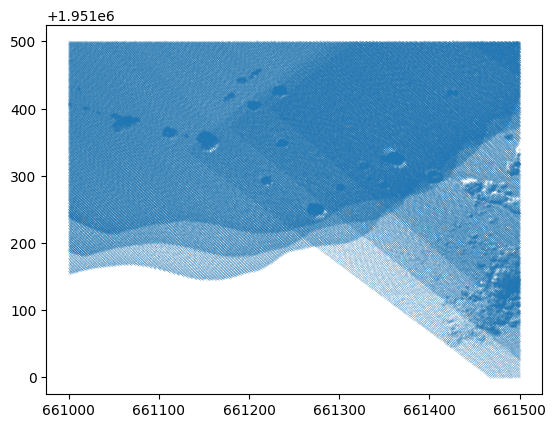

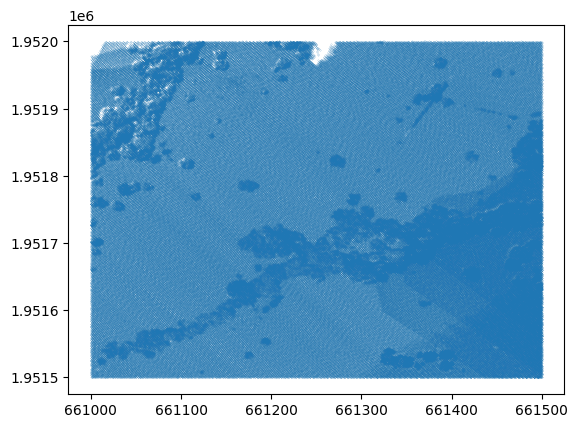

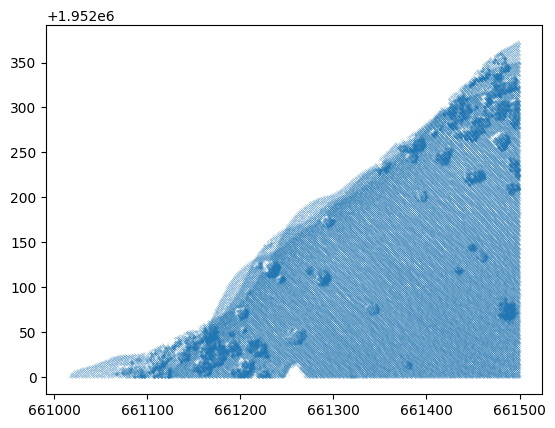

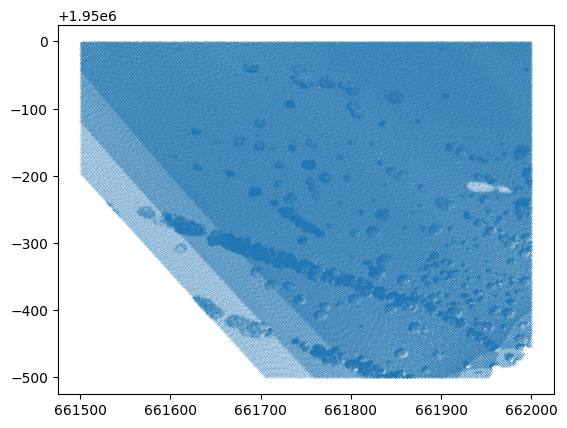

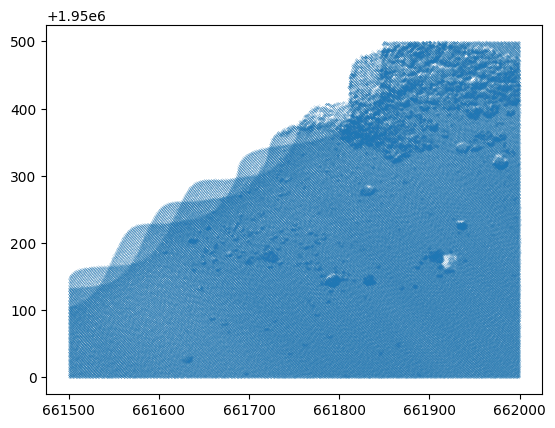

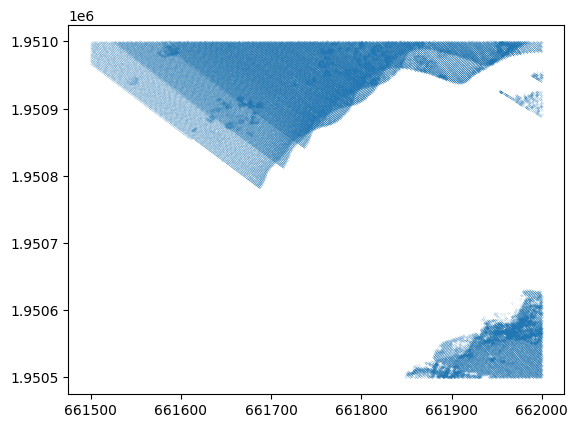

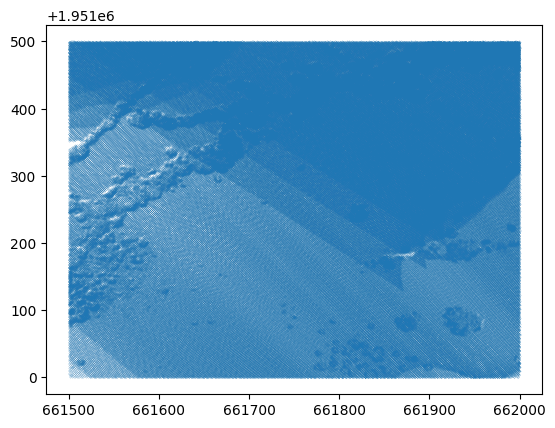

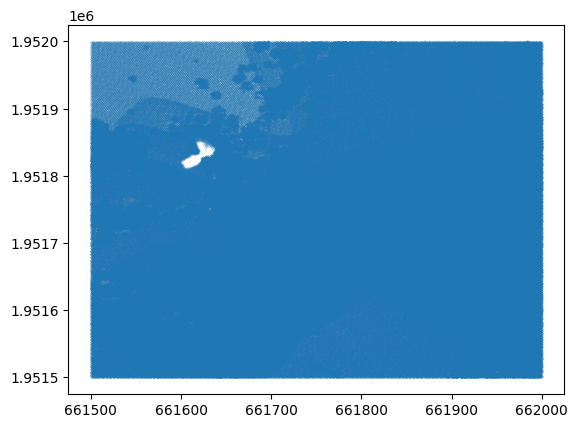

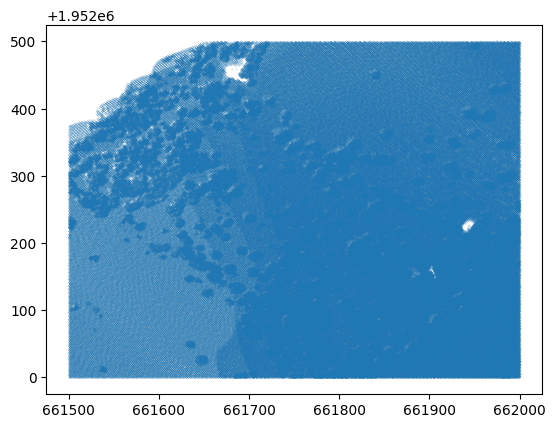

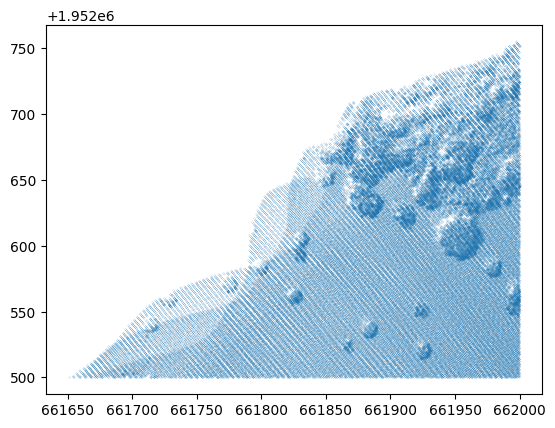

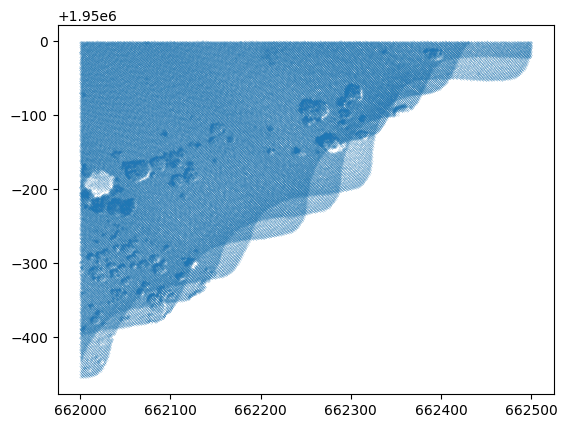

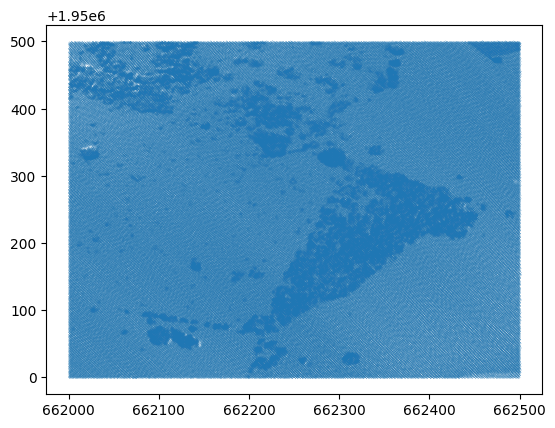

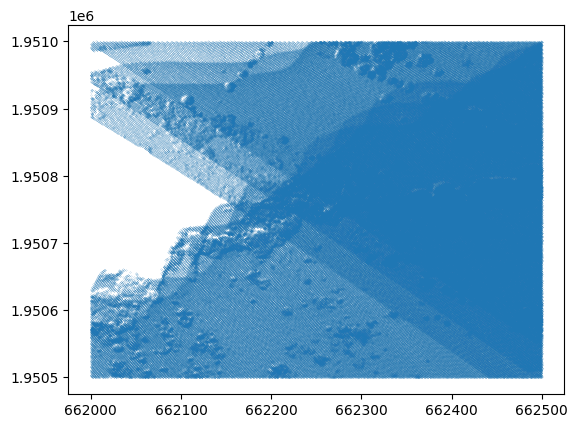

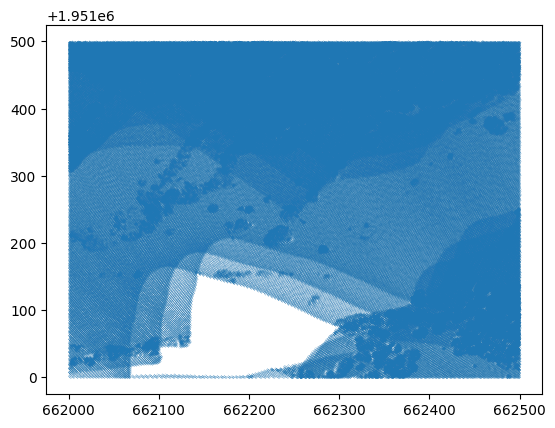

KeyboardInterrupt: 

In [ ]:
for tile_name in df['File Name']:
    plot_tile(tile_name)